<a href="https://colab.research.google.com/github/prathammehta16/ML_University_Course/blob/main/Lab3_LinearRegression_TemperatureVSCricketChirps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20IT068**

**Practical 3**

**Dataset:**
**Cricket chirps vs temperature**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [52]:
df = pd.read_csv('/content/Cricket_chirps.csv')
df.head()

,X,Y
0,88.599998,19
1,71.599998,16
2,93.300003,22
3,84.300003,17
4,80.599998,19


**How many total observations in data?**

As we can see below, there are total of 1499 observations.

In [53]:
df.shape

(1499, 2)

**How many independent variables?**

As we can see below, there is only one independent variable that is Temperature. We can also see from the correlation chart that Temperature is the independent variable.

**Which is dependent variable?**

Here the column 'Chirps per second' is the dependent variable as we can see from the correlation chart.

In [70]:
df.X

0       88.599998
1       71.599998
2       93.300003
3       84.300003
4       80.599998
          ...    
1494    81.000000
1495    81.000000
1496    86.000000
1497    83.000000
1498    72.000000
Name: X, Length: 1499, dtype: float64

**Which are most useful variable in estimation? Prove using correlation.**

As seen below, variable X i.e the Temperature column is the most useful variable for estimation.

In [54]:
data = df.corr()
data.iloc[0:1,1:]

,Y
X,0.729448


**Why regression is applicable on the selected dataset? Discuss full story behind dataset.**

**Ans**- I took this dataset from 'https://www.kaggle.com/datasets/hershyandrew/cricket-chirp-vs-temperature?resource=download' where we have to predict the chirps per second by Cricket with the given temperature.

As seen in the below figure we can observe that with a increase in temperature, the chirps per second also increases. 




**Which type of regression is applicable?**


And that is why Linear Regression would be the best algorithm to use to predict chirps per second given the temperature.

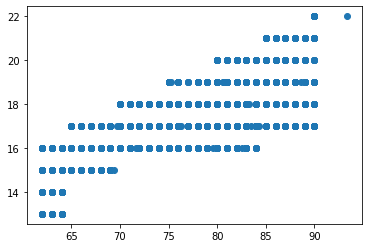

In [55]:
plt.scatter(df.X, df.Y)
plt.show()

**Implement linear regression using OLS method.**

In [56]:
from sklearn.metrics import mean_squared_error
x_bar = df.X.sum()/df.X.count()
y_bar = df.Y.sum()/df.Y.count()
print(x_bar,y_bar)

n = ((df.X-x_bar) * (df.Y-y_bar)).sum()
d = ((df.X-x_bar)**2).sum()
ols_m = n/d
ols_b = y_bar - ols_m* x_bar
print(ols_m, ols_b)
print(ols_m*40+ols_b)
print(mean_squared_error([ols_m*40+ols_b],[57.8]))

76.09646430850567 17.258839226150766
0.15798103747725686 5.237040846341992
11.556282345432267
2138.481422515379


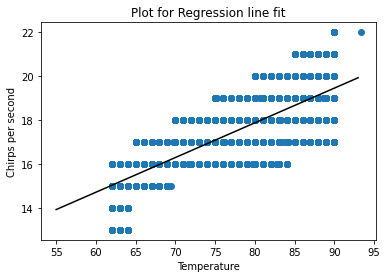

In [68]:
predicted_df = pd.DataFrame(data = np.arange(55, df.X.max()), columns=['X'])
predicted_df['Y'] = predicted_df.X*ols_m + ols_b
x = predicted_df['X']
y = predicted_df['Y']

plt.plot(x,y,c='black')

plt.scatter(df.X, df.Y)
plt.xlabel('Temperature')
plt.ylabel('Chirps per second')
plt.title('Plot for Regression line fit')

plt.show()


In [59]:
from math import sqrt
from sklearn.metrics import r2_score
score_df = pd.DataFrame(columns = ['OLS','GD','SK'], index=['RMSE','SSE','r2_score'])

score_df.iloc[0,0] = sqrt(mean_squared_error(df.Y, ols_m*df.X+ols_b))
score_df.iloc[1,0] = mean_squared_error(df.Y, ols_m*df.X+ols_b) * len(df.Y)
score_df.iloc[2,0] = r2_score(df.Y, ols_m*df.X+ols_b)
score_df.head()

,OLS,GD,SK
RMSE,1.230354,NaN,NaN
SSE,2269.144157,NaN,NaN
r2_score,0.532094,NaN,NaN


**Implement linear regression using Gradient Descent from scratch**

In [60]:
X = df.iloc[:, 0]
Y = df.iloc[:, 1]

gd_m = 0
gd_c = 0

L = 0.0001 
epochs = 60     

n = float(len(X))

for i in range(epochs):
    Y_pred = gd_m*X + gd_c  
    D_m = (-2/n) * sum(X * (Y - Y_pred))  
    D_c = (-2/n) * sum(Y - Y_pred)  
    gd_m = gd_m - L * D_m  
    gd_c = gd_c - L * D_c  
print ("m = ",gd_m, 'c = ', gd_c)

m =  0.22594446365845808 c =  0.0036735093309410464


In [62]:
score_df.iloc[0,1] = sqrt(mean_squared_error(df.Y, gd_m*df.X+gd_c))
score_df.iloc[1,1] = mean_squared_error(df.Y, gd_m*df.X+gd_c) * len(df.Y)
score_df.iloc[2,1] = r2_score(df.Y, gd_m*df.X+gd_c)
score_df.head()


,OLS,GD,SK
RMSE,1.230354,1.355048,NaN
SSE,2269.144157,2752.395041,NaN
r2_score,0.532094,0.432446,NaN


**Implement linear regression using sklearn API.**

In [63]:
X = pd.DataFrame(df.X)
Y = df.Y
rg = linear_model.LinearRegression()
rg.fit(X, Y)

LinearRegression()

In [64]:
sk_m = rg.coef_
sk_c = rg.intercept_
print(sk_m)

[0.15798104]


**Quantify goodness of your model and discuss steps taken for improvement (RMSE, SSE, R2Score).**

In [65]:
score_df.iloc[0,2] = sqrt(mean_squared_error(df.Y, sk_m*df.X+sk_c))
score_df.iloc[1,2] = mean_squared_error(df.Y, sk_m*df.X+sk_c) * len(df.Y)
score_df.iloc[2,2] = r2_score(df.Y, sk_m*df.X+sk_c)
score_df.head()

,OLS,GD,SK
RMSE,1.230354,1.355048,1.230354
SSE,2269.144157,2752.395041,2269.144157
r2_score,0.532094,0.432446,0.532094


In [66]:
X.max()[0]

93.30000305

**Discuss comparison of different methods.**

As we can see from the above scores we can say that 'Ordinary Least Squares' method and Sklearn api performed better than the Gradient Descent. Both the OLS method and the sklearn API can be used to implement linear regression. The OLS method is a more theoretical approach to linear regression, where the parameters of the model are calculated using matrix algebra and probability theory. The sklearn API, on the other hand, is a practical tool for implementing linear regression in Python. It provides a simple and easy-to-use interface for fitting and predicting linear regression models.

OLS is generally faster and more computationally efficient but it's not suitable for datasets with large number of features or when data is not linear. Gradient Descent is generally slower but it's more flexible and can be used for non-linear datasets and also when data has a large number of features.

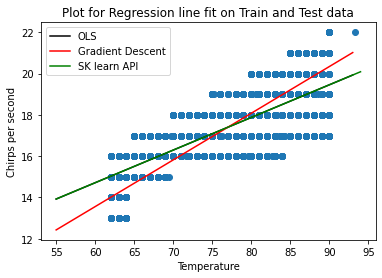

In [69]:
predicted_df = pd.DataFrame(data = np.arange(55, df.X.max()), columns=['X'])
predicted_df['Y'] = predicted_df.X*ols_m + ols_b
x = predicted_df['X']
y = predicted_df['Y']
plt.plot(x,y,c='black', label='OLS')

predicted_df = pd.DataFrame(data = np.arange(55, df.X.max()), columns=['X'])
predicted_df['Y'] = predicted_df.X*gd_m + gd_c
x = predicted_df['X']
y = predicted_df['Y']
plt.plot(x,y,c='red', label='Gradient Descent')

x = np.arange(X.max()[0])
x = np.arange(55,95)

y= x*sk_m + sk_c
plt.plot(x,y,c='green', label='SK learn API')

plt.scatter(df.X, df.Y)
plt.xlabel('Temperature')
plt.ylabel('Chirps per second')
plt.title('Plot for Regression line fit on Train and Test data')
plt.legend()
plt.show()